Expense Tracker Ready to Use!

--- Expense Tracker ---
1. Add New Expense
2. Update an Expense
3. Delete an Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Select an option: 4

Total Expense by Category:
Category
Food    1200.0
Name: Amount, dtype: float64

Category with Highest Expense:
Food

Category with Lowest Expense:
Food

--- Expense Tracker ---
1. Add New Expense
2. Update an Expense
3. Delete an Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Select an option: 5


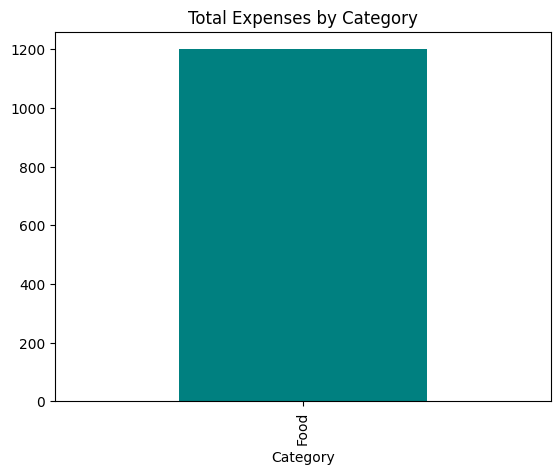

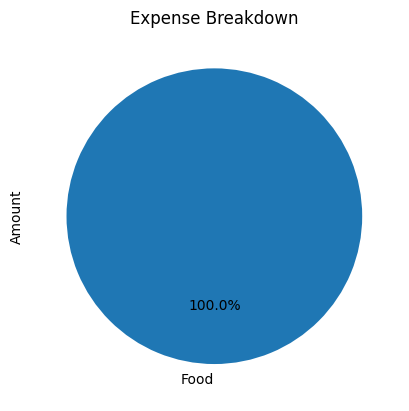


--- Expense Tracker ---
1. Add New Expense
2. Update an Expense
3. Delete an Expense
4. Analyze Expenses
5. Visualize Expenses
6. Exit
Select an option: 6
Exiting the Expense Tracker. Goodbye!


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# File path
expense_file = "my_expenses.csv"

# Initialize the expense tracker
if not os.path.isfile(expense_file):
    expense_data = pd.DataFrame(columns=["Date", "Category", "Description", "Amount"])
    expense_data.to_csv(expense_file, index=False)
else:
    expense_data = pd.read_csv(expense_file)

print("Expense Tracker Ready to Use!")

# Function to add a new expense
def add_new_expense():
    entry_date = input("Enter date (YYYY-MM-DD): ")
    expense_category = input("Enter category (Food, Transport, etc.): ")
    short_description = input("Enter a brief description: ")
    expense_amount = float(input("Enter amount: "))

    new_row = {
        "Date": entry_date,
        "Category": expense_category,
        "Description": short_description,
        "Amount": expense_amount
    }

    global expense_data
    expense_data = pd.concat([expense_data, pd.DataFrame([new_row])], ignore_index=True)
    expense_data.to_csv(expense_file, index=False)
    print("Expense recorded successfully!")

# Function to modify an existing expense
def modify_expense():
    target_date = input("Enter the date of the expense to modify (YYYY-MM-DD): ")
    target_category = input("Enter the category: ")

    match = expense_data[(expense_data["Date"] == target_date) & (expense_data["Category"] == target_category)].index
    if not match.empty:
        updated_description = input("Enter new description: ")
        updated_amount = float(input("Enter new amount: "))

        expense_data.loc[match, "Description"] = updated_description
        expense_data.loc[match, "Amount"] = updated_amount
        expense_data.to_csv(expense_file, index=False)
        print("Expense updated successfully!")
    else:
        print("No matching expense found.")

# Function to remove an expense
def remove_expense():
    del_date = input("Enter the date of the expense to remove (YYYY-MM-DD): ")
    del_category = input("Enter the category: ")

    global expense_data
    expense_data = expense_data[~((expense_data["Date"] == del_date) & (expense_data["Category"] == del_category))]
    expense_data.to_csv(expense_file, index=False)
    print("Expense deleted successfully!")

# Categories for validation
valid_categories = ["Food", "Transport", "Entertainment", "Utilities", "Others"]

# Function to check category validity
def is_category_valid(category_input):
    if category_input not in valid_categories:
        print(f"Invalid category! Please select from: {', '.join(valid_categories)}")
        return False
    return True

# Analyze expenses
def show_expense_analysis():
    print("\nTotal Expense by Category:")
    print(expense_data.groupby("Category")["Amount"].sum())

    print("\nCategory with Highest Expense:")
    print(expense_data.groupby("Category")["Amount"].sum().idxmax())

    print("\nCategory with Lowest Expense:")
    print(expense_data.groupby("Category")["Amount"].sum().idxmin())

# Visualize expenses
def plot_expenses():
    category_totals = expense_data.groupby("Category")["Amount"].sum()

    # Bar graph
    category_totals.plot(kind="bar", title="Total Expenses by Category", color="teal")
    plt.show()

    # Pie chart
    category_totals.plot(kind="pie", title="Expense Breakdown", autopct="%1.1f%%", startangle=90)
    plt.show()

# Menu interface
def expense_menu():
    while True:
        print("\n--- Expense Tracker ---")
        print("1. Add New Expense")
        print("2. Update an Expense")
        print("3. Delete an Expense")
        print("4. Analyze Expenses")
        print("5. Visualize Expenses")
        print("6. Exit")

        user_choice = input("Select an option: ")

        if user_choice == "1":
            add_new_expense()
        elif user_choice == "2":
            modify_expense()
        elif user_choice == "3":
            remove_expense()
        elif user_choice == "4":
            show_expense_analysis()
        elif user_choice == "5":
            plot_expenses()
        elif user_choice == "6":
            print("Exiting the Expense Tracker. Goodbye!")
            break
        else:
            print("Invalid selection. Please choose a valid option.")

expense_menu()